In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-ott/customer_data.csv


In [3]:
df = pd.read_csv('/kaggle/input/customer-churn-ott/customer_data.csv')
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [4]:
df.drop('customer_id', axis='columns', inplace=True)
df.dtypes

year                        int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [5]:
df.drop('year', axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_no                2000 non-null   object 
 1   gender                  1976 non-null   object 
 2   age                     2000 non-null   int64  
 3   no_of_days_subscribed   2000 non-null   int64  
 4   multi_screen            2000 non-null   object 
 5   mail_subscribed         2000 non-null   object 
 6   weekly_mins_watched     2000 non-null   float64
 7   minimum_daily_mins      2000 non-null   float64
 8   maximum_daily_mins      2000 non-null   float64
 9   weekly_max_night_mins   2000 non-null   int64  
 10  videos_watched          2000 non-null   int64  
 11  maximum_days_inactive   1972 non-null   float64
 12  customer_support_calls  2000 non-null   int64  
 13  churn                   1965 non-null   float64
dtypes: float64(5), int64(5), object(4)
memor

In [7]:
#printing out a list of all the columns in our training dataset
df.columns

Index(['phone_no', 'gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

Types of features :

1) Categorical : gender, multi_screen, mail_subscribed, churn
2) Continuous : age, no_of_days_subscribed, weekly_mins_watched, minimum_daily_mins, maximum_daily_mins, weekly_max_night_mins, videos_watched, maximum_days_inactive, customer_support_calls
3) Alphanumeric: phone_no

In [8]:
df.drop('phone_no', axis='columns', inplace=True)

In [9]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [10]:
#filling the missing Embarked values in train and test datasets
df.gender.fillna('Female',inplace=True)

In [11]:
df.isnull().sum()

gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [12]:
print("The Median is :", int(df.maximum_days_inactive.median()))

The Median is : 3


In [13]:
#filling the missing values in the Maximum inactive days column
df.maximum_days_inactive.fillna(3, inplace=True)

In [14]:
print("The Median is :", int(df.churn.median()))

The Median is : 0


## Filling the missing values in the Churn column

In [15]:
#filling the missing values in the Churn column
df.churn.fillna(0, inplace=True)

In [16]:
df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

## Converting categorical variables into numerical ones

In [17]:
#Converting categorical variables into numerical ones
df2 = pd.get_dummies(df,columns=['gender','multi_screen','mail_subscribed'],drop_first=True)
df2.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Male,multi_screen_yes,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0,0


## Splitting out trianing data into X: features and Y: target

In [18]:
#Splitting out training data into X: features and Y: target
X = df2.drop("churn",axis=1) 
Y = df2["churn"]

### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# Storing the fit object for later reference
sc=sc.fit(X)
# Generating the standardized values of X and y
X=sc.transform(X)


#splitting our training data again in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

## Logistic Regression

In [19]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_logreg

86.17

In [20]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,Y,cv=5)
 
np.mean(cv_scores)*100

87.1

The accuracy score is  86.16666666666667 %
[[505  15]
 [ 68  12]]


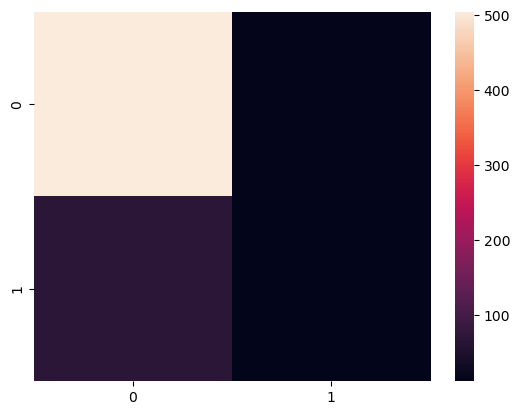

In [21]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [22]:

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       520
         1.0       0.44      0.15      0.22        80

    accuracy                           0.86       600
   macro avg       0.66      0.56      0.57       600
weighted avg       0.82      0.86      0.83       600



## Decision Tree Classifier

In [23]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, Y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': 5}
Best score: 91.5


In [24]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

The accuracy score is  86.66666666666667 %
[[480  40]
 [ 40  40]]


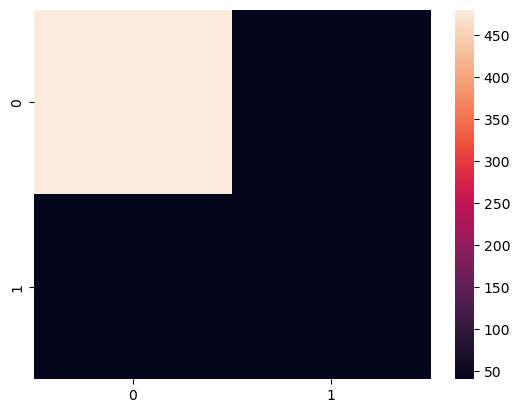

In [25]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [26]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       520
         1.0       0.50      0.50      0.50        80

    accuracy                           0.87       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.87      0.87      0.87       600



## Random Forest Classifier

In [27]:
#Random Forest Classifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, Y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 14}
Best score: 92.10000000000001


In [28]:

classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

The accuracy score is  89.16666666666667 %
[[494  26]
 [ 39  41]]


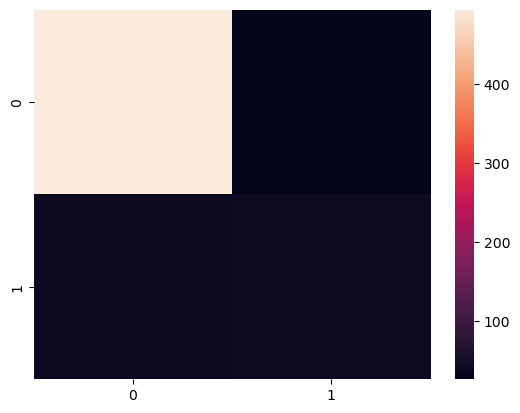

In [29]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       520
         1.0       0.61      0.51      0.56        80

    accuracy                           0.89       600
   macro avg       0.77      0.73      0.75       600
weighted avg       0.88      0.89      0.89       600



##Gradient Boosting Classifier

In [31]:
#Gradient Boosting Classifier

gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, Y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': 5, 'n_estimators': 13}
Best score: 92.15


In [32]:
classifier=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)


The accuracy score is  86.66666666666667 %
[[491  29]
 [ 51  29]]


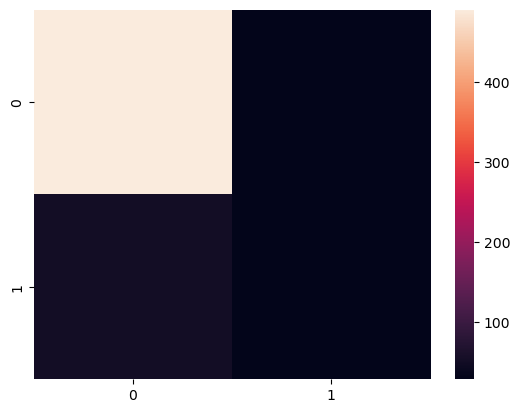

In [33]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [34]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       520
         1.0       0.50      0.36      0.42        80

    accuracy                           0.87       600
   macro avg       0.70      0.65      0.67       600
weighted avg       0.85      0.87      0.86       600



## KNN classificattion

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_pred, Y_test) * 100, 2)
acc_knn


87.67

The accuracy score is  87.66666666666667 %
[[508  12]
 [ 62  18]]


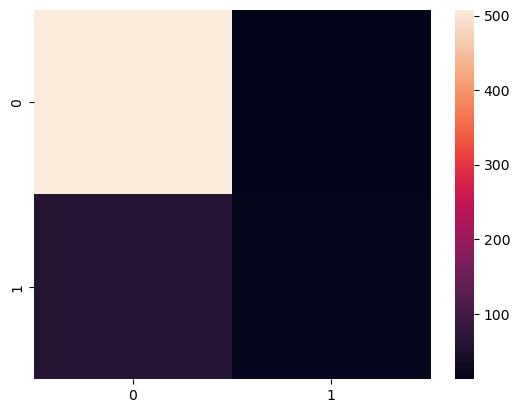

In [36]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [37]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       520
         1.0       0.60      0.23      0.33        80

    accuracy                           0.88       600
   macro avg       0.75      0.60      0.63       600
weighted avg       0.85      0.88      0.85       600



## Gradient boost on test data

In [38]:
classifier = GradientBoostingClassifier(n_estimators =13, max_depth = 5)
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)

0.9

In [39]:
Y_pred = classifier.predict(X_test)

The accuracy score is  90.0 %
[[501  19]
 [ 41  39]]


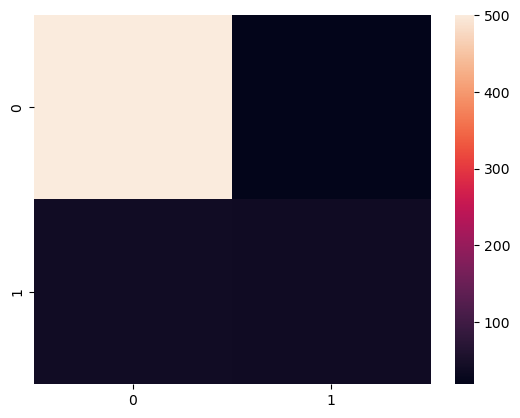

In [40]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [41]:

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       520
         1.0       0.67      0.49      0.57        80

    accuracy                           0.90       600
   macro avg       0.80      0.73      0.75       600
weighted avg       0.89      0.90      0.89       600



## XGBOOST

In [42]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

The accuracy score is  90.0 %
[[501  19]
 [ 41  39]]


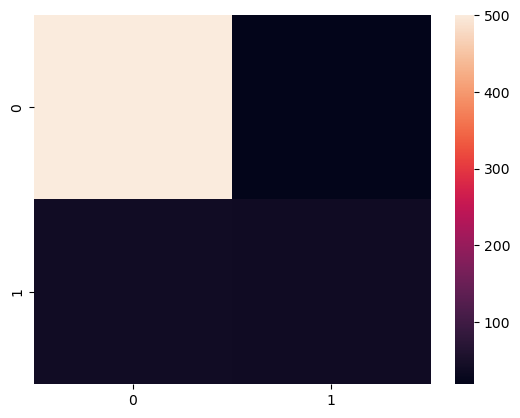

In [43]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.86 %
Standard Deviation: 1.11 %


In [45]:

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       520
         1.0       0.63      0.55      0.59        80

    accuracy                           0.90       600
   macro avg       0.78      0.75      0.76       600
weighted avg       0.89      0.90      0.89       600



## Support vector machine

In [46]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

The accuracy score is  90.0 %
[[501  19]
 [ 41  39]]


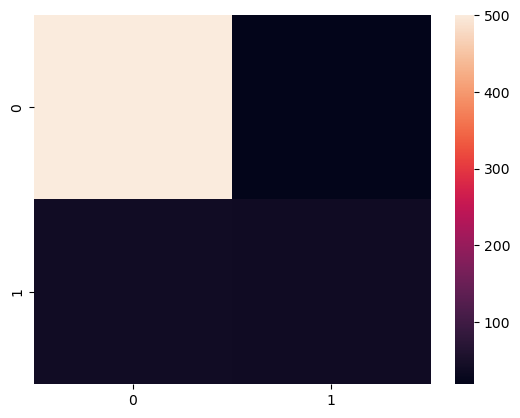

In [47]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [48]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       520
         1.0       0.00      0.00      0.00        80

    accuracy                           0.87       600
   macro avg       0.43      0.50      0.46       600
weighted avg       0.75      0.87      0.80       600



## Kernel SVM

In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

The accuracy score is  90.0 %
[[501  19]
 [ 41  39]]


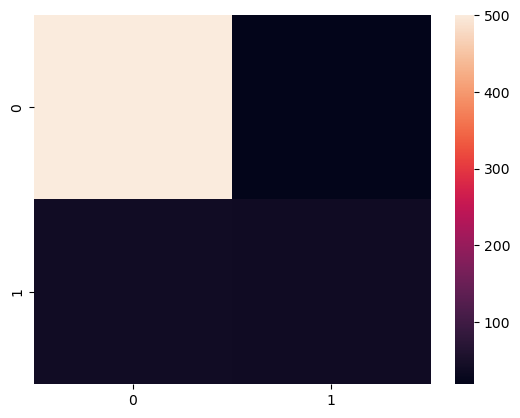

In [50]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [51]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       520
         1.0       0.58      0.28      0.37        80

    accuracy                           0.88       600
   macro avg       0.74      0.62      0.65       600
weighted avg       0.85      0.88      0.86       600



## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [53]:
y_pred = classifier.predict(X_test)

The accuracy score is  90.0 %
[[501  19]
 [ 41  39]]


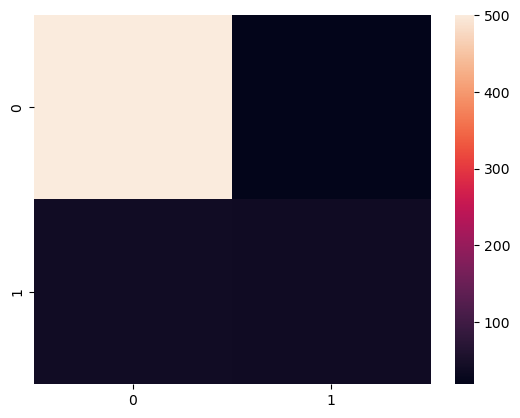

In [54]:
accuracy = metrics.accuracy_score(Y_test,Y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [55]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       520
         1.0       0.44      0.47      0.46        80

    accuracy                           0.85       600
   macro avg       0.68      0.69      0.69       600
weighted avg       0.85      0.85      0.85       600



## LAZYBOOST

In [56]:
!pip install lazypredict

In [57]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

import lightgbm as lgb

In [58]:
clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
model_dictionary = clf.provide_models(X_train, X_test, Y_train, Y_test)
models

 17%|█▋        | 5/29 [00:00<00:03,  7.45it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 66%|██████▌   | 19/29 [00:01<00:00, 12.48it/s]

NuSVC model failed to execute
specified nu is infeasible


 93%|█████████▎| 27/29 [00:02<00:00, 13.27it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:04<00:00,  7.17it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.90,0.75,0.75,0.90,0.92
XGBClassifier,0.90,0.75,0.75,0.89,0.57
DecisionTreeClassifier,0.87,0.74,0.74,0.87,0.03
RandomForestClassifier,0.90,0.74,0.74,0.89,0.38
BaggingClassifier,0.90,0.72,0.72,0.89,0.09
ExtraTreesClassifier,0.90,0.71,0.71,0.89,0.26
ExtraTreeClassifier,0.86,0.70,0.70,0.86,0.02
GaussianNB,0.85,0.69,0.69,0.85,0.02
QuadraticDiscriminantAnalysis,0.86,0.69,0.69,0.86,0.02


In [59]:
model = lgb.LGBMClassifier(verbose=0)
model.fit(X_train,Y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMClassifier(verbose=0)

In [60]:
y_test_predicted = model.predict(X_test)

The accuracy score is  90.16666666666666 %
[[496  24]
 [ 35  45]]


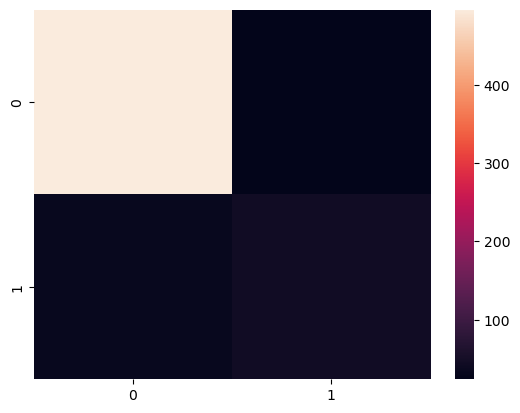

In [61]:
from sklearn import metrics

accuracy = metrics.accuracy_score(Y_test,y_test_predicted)
confusion_matrix = metrics.confusion_matrix(Y_test,y_test_predicted)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [62]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       520
         1.0       0.44      0.47      0.46        80

    accuracy                           0.85       600
   macro avg       0.68      0.69      0.69       600
weighted avg       0.85      0.85      0.85       600

